<a href="https://colab.research.google.com/github/AliyaBadmaeva/PDP/blob/main/Badmaeva_A_A__PDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
!pip install --upgrade matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 54.8 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.10.0
    Uninstalling matplotlib-3.10.0:
      Successfully uninstalled matplotlib-3.10.0


In [90]:
import os
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import wordcloud
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import unicodedata
import zipfile
from zipfile import ZipFile
import re

In [91]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [92]:
import string

In [93]:
import plotly.express as px
import plotly.figure_factory as ff

In [94]:
import warnings
warnings.filterwarnings('ignore')

In [95]:
import spacy.cli
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [96]:
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [97]:
# ссылка на датасет на Гитхабе
IMDB = 'https://raw.githubusercontent.com/AliyaBadmaeva/imdb/master/IMDB_Dataset.zip'

In [98]:
req = requests.get(IMDB)  # получение доступа к файлу с помощью библиотеки запросов - requests
with open("IMDB_Dataset.zip", "wb") as data:
    data.write(req.content)

In [99]:
with ZipFile("IMDB_Dataset.zip", 'r') as new:  # открываем зип в формате read - чтение
    new.extractall()  # извлекаем содержимое

In [100]:
os.remove('IMDB_Dataset.zip')  # удаление зип-архива

In [101]:
imdb = pd.read_csv('IMDB Dataset.csv')  # чтение данных с помощью юиюлиотеки Pandas
imdb.head(10)  # Первые 10 строк датасета

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [102]:
imdb.info()  # типы данных для каждого их признаков и количество строк

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [103]:
imdb.describe()  # статистические данные

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [104]:
imdb['sentiment'].value_counts()  # количество данных в целевом признаке

,count
sentiment,
positive,25000
negative,25000


In [105]:
imdb.duplicated().sum()  # количество дублей

np.int64(418)

In [106]:
imdb = imdb.drop_duplicates()  # удаление повторов и перезапись в датасет очищенных от дублей данных

In [107]:
imdb.info()  # посмотрим, успешно ли прошло удаление

<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [108]:
imdb['sentiment'].value_counts()

,count
sentiment,
positive,24884
negative,24698


In [109]:
print('Положительные отзывы составляют', f"{(round(len(imdb[imdb['sentiment']=='positive'].value_counts())/len(imdb) * 100,2))} %")
print('Отрицательные отзывы составляют', f"{(round(len(imdb[imdb['sentiment']=='negative'].value_counts())/len(imdb) * 100,2))} %")

Положительные отзывы составляют 50.19 %
Отрицательные отзывы составляют 49.81 %


In [110]:
sns.set(style="white")  # белый фон без линий сетки

In [111]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


<Figure size 3000x3000 with 0 Axes>

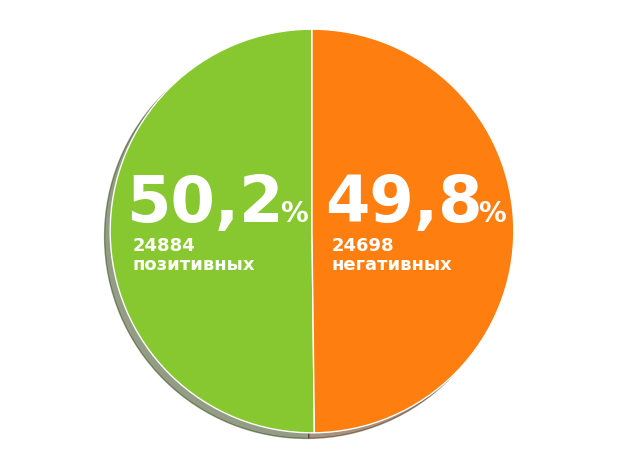

In [144]:
plt.figure(figsize = (30,30))  # Нарисуем пирог
fig, ax = plt.subplots(facecolor='w')

ax.pie(imdb['sentiment'].value_counts(),colors=['#87c830','#fe7e0f'],
        shadow=True, startangle=90,
        pctdistance=(1.2))

fig.text(0.52, 0.52, '49,8', fontsize=46, fontweight=600, fontfamily='DejaVu Sans', color='w')
fig.text(0.76, 0.52, '%', fontsize=20, fontweight=600, fontfamily='DejaVu Sans', color='w')
fig.text(0.53, 0.46, '24698', fontsize=13, fontweight=700, fontfamily='DejaVu Sans', color='w')
fig.text(0.53, 0.42, 'негативных', fontsize=13, fontweight=700, fontfamily='DejaVu Sans', color='w')
fig.text(0.21, 0.52, '50,2', fontsize=46, fontweight=700, fontfamily='DejaVu Sans', color='w')
fig.text(0.45, 0.52, '%', fontsize=20, fontweight=600, fontfamily='DejaVu Sans', color='w')
fig.text(0.22, 0.46, '24884', fontsize=13, fontweight=700, fontfamily='DejaVu Sans', color='w')
fig.text(0.22, 0.42, 'позитивных', fontsize=13, fontweight=700, fontfamily='DejaVu Sans', color='w')
plt.tight_layout()

plt.savefig('percent_of_pos_and_neg_sentiments.png', dpi=100,
        bbox_inches='tight', pad_inches=0.1)
plt.axis('equal')
plt.show();